# Overall stats for "full" dataset (5409 problems, including proof-based)

In [1]:
import sys
from pathlib import Path

BASEDIR = Path("/workspaces/HARP/") / "src"  # Replace with your own basedir path for the repo

sys.path.insert(0, str(BASEDIR))

In [2]:
import os
import json

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from eval.utils import read_jsonl, write_jsonl, get_uid

In [3]:
raw_problems = read_jsonl(BASEDIR / 'data/processed/HARP_raw.jsonl')
raw_df = pd.DataFrame(raw_problems)
int(raw_df['num_gpt4_tokens'].sum())

4769734

In [4]:
all_problems = read_jsonl(BASEDIR / 'data/processed_with_dup_info/aops_wiki_final_with_MATH_match.jsonl')
df = pd.DataFrame(all_problems)
df['num_gpt4_tokens'].sum()

np.int64(4769734)

In [5]:
df.head()

,year,contest,number,url,level,subject,multiple_choice_only,full_text,num_gpt4_tokens,choices,...,solution_10_metadata,solution_10,solution_11_metadata,solution_11,solution_12_metadata,solution_12,solution_13_metadata,solution_13,solution_14_metadata,solution_14
0,1950,AHSME,1,https://artofproblemsolving.com/wiki/index.php...,2,prealgebra,False,# Problem\nIf $64$ is divided into three parts...,231,"{'A': '$5\frac{1}{3}$', 'B': '$11$', 'C': '$10...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1950,AHSME,2,https://artofproblemsolving.com/wiki/index.php...,2,algebra,False,"# Problem\nLet $R=gS-4$. When $S=8$, $R=16$. W...",214,"{'A': '$11$', 'B': '$14$', 'C': '$20$', 'D': '...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1950,AHSME,3,https://artofproblemsolving.com/wiki/index.php...,2,algebra,True,# Problem\nThe sum of the roots of the equatio...,197,"{'A': '$8$', 'B': '$-5$', 'C': '$-\frac{5}{4}$...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1950,AHSME,4,https://artofproblemsolving.com/wiki/index.php...,2,prealgebra,False,"# Problem\nReduced to lowest terms, $\frac{a^{...",279,"{'A': '$\frac{a}{b}$', 'B': '$\frac{a^{2}-2b^{...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1950,AHSME,5,https://artofproblemsolving.com/wiki/index.php...,2,algebra,False,# Problem\nIf five geometric means are inserte...,274,"{'A': '$648$', 'B': '$832$', 'C': '$1168$', 'D...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df[df['year'] == '2023']['contest'].unique()

array(['AMC_8', 'AMC_10A', 'AMC_10B', 'AMC_12A', 'AMC_12B', 'AIME_I',
       'AIME_II', 'USAMO', 'USAJMO'], dtype=object)

### Our dataset has 2 solutions per problem on average. about half the problems have multiple solutions

In [7]:
print("Total num solutions:", df['num_solutions'].sum())
print("Problems with >1 solution:", (df['num_solutions'] > 1).sum())
print("# Problems in dataset", len(df))
print("# Problems in dataset with answer", df['answer'].notna().sum())
print("Avg. solutions per problem:", df['num_solutions'].sum()/len(df))
print("Frac. problems with >1 solution:", (df['num_solutions'] > 1).sum()/len(df))

Total num solutions: 11269
Problems with >1 solution: 2611
# Problems in dataset 5409
# Problems in dataset with answer 5098
Avg. solutions per problem: 2.0833795525975227
Frac. problems with >1 solution: 0.4827139951931965


### Surprisingly, answer choices are skewed towards B/C/D. This doesn't seem to be a processing bug, so maybe is a quirk of AMC test writing?

In [8]:
_, counts = np.unique(df[df['answer_choice'].notna()]['answer_choice'], return_counts=True)
print(counts, np.sum(counts))

[615 930 934 994 642] 4115


### We have 7682 solutions with an answer choice

In [9]:
(raw_df['contest'].isin(['AIME', 'AIME_I', 'AIME_II', 'USAMO', 'USAJMO'])).sum()

np.int64(1294)

In [10]:
5409 - int((raw_df['contest'].isin(['AIME', 'AIME_I', 'AIME_II', 'USAMO', 'USAJMO'])).sum())

4115

In [11]:
df.choices.notna().sum()

np.int64(4115)

In [12]:
df[df.choices.notna()].num_solutions.sum()

np.int64(7682)

## Let's look at metadata for all solutions

In [13]:
total_solution_metadata = [((df['solution_{}_metadata'.format(i)] != '') 
                            & (df['solution_{}_metadata'.format(i)].notna())).sum() 
                           for i in range(1, 15)]
print(total_solution_metadata, sum(total_solution_metadata))

max_num_solutions = 14
vals = [df['solution_{}'.format(i)].count() for i in range(max_num_solutions, 0, -1)]
num_solutions = np.flip(np.diff(vals, prepend=0))
total_solutions = np.sum(num_solutions*np.arange(1, 15))
print(num_solutions, total_solutions)

print(sum(total_solution_metadata)/total_solutions)

[np.int64(403), np.int64(669), np.int64(538), np.int64(353), np.int64(219), np.int64(146), np.int64(74), np.int64(49), np.int64(28), np.int64(20), np.int64(13), np.int64(7), np.int64(2), np.int64(0)] 2521
[2798 1164  633  372  195  111   68   25   18    9    8    6    1    1] 11269
0.22371106575561275


## Let's look at metadata for short answer solutions

In [14]:
sa_df = df[(~df['contest'].str.endswith('MO')) & (~df['multiple_choice_only']) & (df['subject'] != 'calculus')]

In [15]:
sa_df['url'].count()

np.int64(4780)

In [16]:
total_solution_metadata = [((sa_df['solution_{}_metadata'.format(i)] != '') 
                            & (sa_df['solution_{}_metadata'.format(i)].notna())).sum() 
                           for i in range(1, 15)]
print(total_solution_metadata, sum(total_solution_metadata))

max_num_solutions = 14
vals = [sa_df['solution_{}'.format(i)].count() for i in range(max_num_solutions, 0, -1)]
num_solutions = np.flip(np.diff(vals, prepend=0))
total_solutions = np.sum(num_solutions*np.arange(1, 15))
print(num_solutions, total_solutions)

print(sum(total_solution_metadata)/total_solutions)

[np.int64(374), np.int64(634), np.int64(510), np.int64(341), np.int64(210), np.int64(142), np.int64(72), np.int64(46), np.int64(27), np.int64(19), np.int64(13), np.int64(7), np.int64(2), np.int64(0)] 2397
[2396 1027  595  345  185  100   67   24   17    8    8    6    1    1] 10221
0.23451717053125917


In [17]:
all_metadata = [list(sa_df['solution_{}_metadata'.format(i)][(sa_df['solution_{}_metadata'.format(i)] != '') 
                                                            & (sa_df['solution_{}_metadata'.format(i)].notna())]) 
                                                           for i in range(1, 15)]

In [18]:
all_metadata

[['Kind of Lame',
  'Similarity',
  'takes advantage of answer choices',
  'Full Proof',
  'coordinates',
  'Trial and Error',
  'Very Stupid',
  'Coordinate Geometry',
  'Answer Choices',
  'Law of Sines and Law of Cosines',
  'Two Variables',
  'Inequalities',
  'Multivariable Recursion by Algebra',
  'For the visualizers',
  'Self Torture',
  'Algebra Generalized',
  'Ratio',
  'Sophie Germain Identity',
  'Algebra',
  'Fibonacci Numbers',
  'Symmetry',
  'Quadratic Function',
  'FLT CRT Inequalities',
  'Cevas Theorem Stewarts Theorem',
  'Ten Variables',
  'Synthetic',
  'Coordinate Geometry',
  'Geometric Interpretation',
  'Similarity',
  'Extending Line Segments',
  'uses calculus',
  'Permutation',
  'Overcounting',
  'trigonometry',
  'Alcumus',
  'Generalized',
  'trigonometry',
  'brute force',
  'Coordinate Bash',
  'A',
  'Clever Stars and Bars Manipulation',
  'Fastest',
  'Verifying the Statement',
  'Algebra',
  'Constraints',
  'Pythagorean Theorem',
  'Graph Theory',

# Next, we get some stats on the overlap to MATH

In [19]:
math_overlap = df[df['MATH_match'].notna()].reset_index()
len(math_overlap)

790

In [20]:
math_overlap.head()

,index,year,contest,number,url,level,subject,multiple_choice_only,full_text,num_gpt4_tokens,...,solution_10_metadata,solution_10,solution_11_metadata,solution_11,solution_12_metadata,solution_12,solution_13_metadata,solution_13,solution_14_metadata,solution_14
0,121,1952,AHSME,41,https://artofproblemsolving.com/wiki/index.php...,4,geometry,False,# Problem\nIncreasing the radius of a cylinder...,307,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,128,1952,AHSME,49,https://artofproblemsolving.com/wiki/index.php...,4,geometry,False,# Problem\n[asy] unitsize(27); defaultpen(line...,1975,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,404,1960,AHSME,25,https://artofproblemsolving.com/wiki/index.php...,3,number_theory,False,# Problem\nLet $m$ and $n$ be any two odd numb...,371,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,412,1960,AHSME,33,https://artofproblemsolving.com/wiki/index.php...,4,number_theory,False,# Problem\nYou are given a sequence of $58$ te...,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,416,1960,AHSME,37,https://artofproblemsolving.com/wiki/index.php...,4,geometry,False,# Problem\nThe base of a triangle is of length...,495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
expanded_df = pd.json_normalize(math_overlap['MATH_match'])
expanded_df['level'] = expanded_df.apply(lambda x: int(x.level[-1]), axis=1)

In [22]:
expanded_df.columns

Index(['problem', 'level', 'type', 'solution', 'number', 'split'], dtype='object')

In [23]:
math_overlap = math_overlap.drop('MATH_match', axis=1).join(expanded_df[['level', 'type', 'number', 'split']].add_prefix('MATH/'))

In [24]:
print(math_overlap['MATH/type'].unique())
print(math_overlap['subject'].unique())

['Geometry' 'Number Theory' 'Precalculus' 'Intermediate Algebra'
 'Counting & Probability' 'Prealgebra' 'Algebra']
['geometry' 'number_theory' 'precalculus' 'counting_and_probability'
 'algebra' 'prealgebra']


In [25]:
SUBJECTS_DISPLAY = {
    'counting_and_probability': {'full': 'Counting and\nProbability', 'abbr': 'C.&P.'},
    'number_theory': {'full': 'Number Theory', 'abbr': 'N.T.'},
    'prealgebra': {'full': 'Prealgebra', 'abbr': 'P.Alg.'},
    'algebra': {'full': 'Algebra', 'abbr': 'Alg.'},
    'precalculus':  {'full': 'Precalculus', 'abbr': 'P.Calc.'},
    'geometry': {'full': 'Geometry', 'abbr': 'Geo.'},
}

HENDRYCKS_SUBJECTS_DISPLAY = {
    'Counting & Probability': {'full': 'Counting and\nProbability', 'abbr': 'C.&P.'},
    'Number Theory': {'full': 'Number Theory', 'abbr': 'N.T.'},
    'Prealgebra': {'full': 'Prealgebra', 'abbr': 'P.Alg.'},
    'Algebra': {'full': 'Algebra', 'abbr': 'Alg.'},
    'Intermediate Algebra': {'full': 'Intermediate\nAlgebra', 'abbr': 'I.Alg.'},
    'Precalculus': {'full': 'Precalculus', 'abbr': 'P.Calc.'},
    'Geometry': {'full': 'Geometry', 'abbr': 'Geo.'},
}

In [26]:
math_overlap_sa = math_overlap[(~math_overlap['contest'].str.endswith('MO') 
                                & ~math_overlap['multiple_choice_only']
                                & (math_overlap['subject'] != 'calculus'))]
len(math_overlap_sa)

781

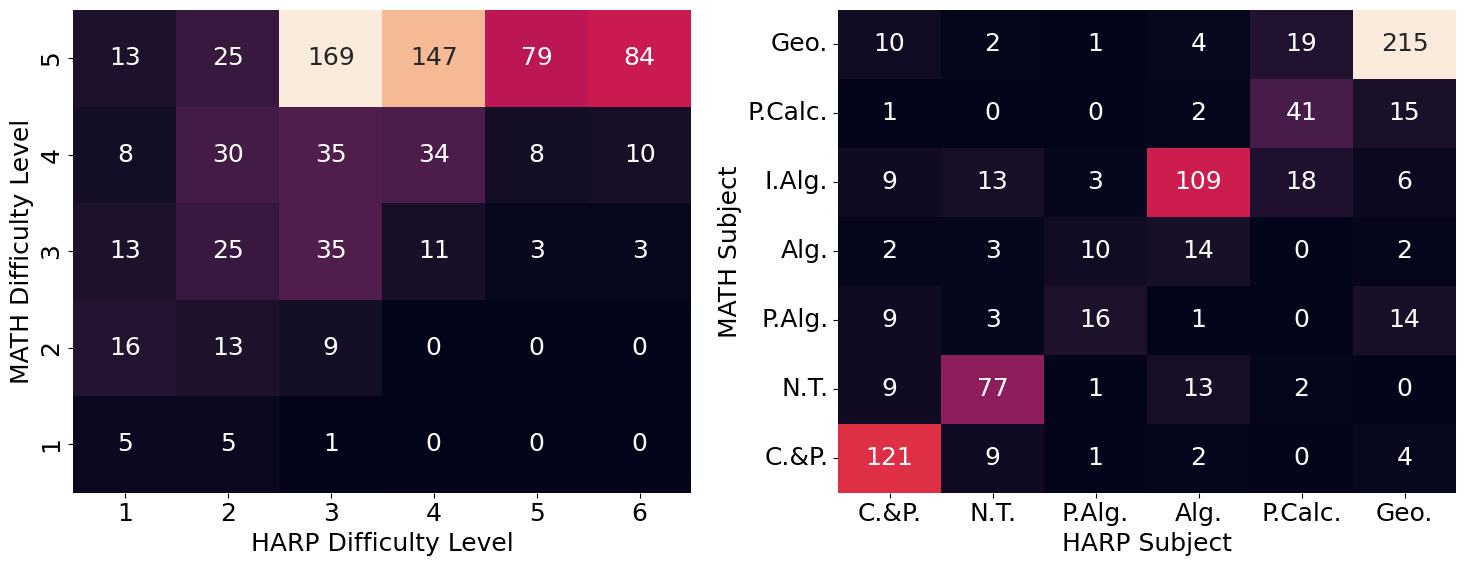

In [27]:
matplotlib.rcParams.update({'font.size': 18})
fig, axs = plt.subplots(1,2)
fig.set_size_inches(15,6)
plot_args = dict() # {'cmap': 'Blues', 'linecolor': '#dddddd', 'linewidths': 2}

difficulty_correlation_df = math_overlap_sa[['level', 'MATH/level']].value_counts()
diff_corr = np.zeros((5, 6)).astype(int)
for j, hmd in enumerate(range(1,7)):
    for i, md in enumerate(range(1,6)):
        tup = (hmd, md)
        diff_corr[i,j] = difficulty_correlation_df[(hmd, md)] if tup in difficulty_correlation_df else 0
# plt.imshow(diff_corr, interpolation='none', origin='lower')
heatmap = sns.heatmap(diff_corr[::-1], annot=True, **plot_args,
                      fmt='d', ax=axs[0], cbar=False,
                      xticklabels=list(range(1,7)),
                      yticklabels=list(range(5,0,-1)))
axs[0].set_xlabel('HARP Difficulty Level')
axs[0].set_ylabel('MATH Difficulty Level')

subject_correlation_df = math_overlap_sa[['subject', 'MATH/type']].value_counts()
subj_corr = np.zeros((len(HENDRYCKS_SUBJECTS_DISPLAY), len(SUBJECTS_DISPLAY))).astype(int)
for j, hmd in enumerate(list(SUBJECTS_DISPLAY)):
    for i, md in enumerate(list(HENDRYCKS_SUBJECTS_DISPLAY)):
        tup = (hmd, md)
        subj_corr[i,j] = subject_correlation_df[(hmd, md)] if tup in subject_correlation_df else 0
# plt.imshow(diff_corr, interpolation='none', origin='lower')
heatmap = sns.heatmap(subj_corr[::-1], annot=True, **plot_args,
                      fmt='d', ax=axs[1], cbar=False,
                      xticklabels=[SUBJECTS_DISPLAY[k]['abbr'] for k in list(SUBJECTS_DISPLAY)],
                      yticklabels=[HENDRYCKS_SUBJECTS_DISPLAY[k]['abbr'] 
                                   for k in list(HENDRYCKS_SUBJECTS_DISPLAY)[::-1]])
axs[1].set_xlabel('HARP Subject')
axs[1].set_ylabel('MATH Subject')
plt.tight_layout()
fig.savefig(BASEDIR / '../images/hendrycks_math_overlap_annot.pdf', bbox_inches='tight')

In [28]:
math_overlap.groupby('MATH/type')['problem'].nunique()

MATH/type
Algebra                    32
Counting & Probability    138
Geometry                  253
Intermediate Algebra      161
Number Theory             103
Prealgebra                 44
Precalculus                59
Name: problem, dtype: int64

In [29]:
math_overlap.groupby('contest')['problem'].nunique()

contest
AHSME       71
AIME       127
AIME_I     133
AIME_II    162
AJHSME       9
AMC_10      12
AMC_10A     34
AMC_10B     39
AMC_12       9
AMC_12A     67
AMC_12B     78
AMC_8       49
Name: problem, dtype: int64

In [30]:
df.groupby('contest')['problem'].nunique()

contest
AHSME      1474
AIME        242
AIME_I      373
AIME_II     368
AJHSME      319
AMC_10       26
AMC_10A     324
AMC_10B     347
AMC_12       41
AMC_12A     485
AMC_12B     503
AMC_8       595
USAJMO       55
USAMO       256
Name: problem, dtype: int64

In [31]:
df['num_solutions'].max()

np.int64(14)

In [32]:
math_overlap[math_overlap['MATH/level'] == 5][['year', 'contest', 'number', 'num_solutions']].head()
# pd.set_option("display.max_rows", None)
# math_overlap[math_overlap['MATH/level'] == 5][['year', 'contest', 'number', 'num_solutions']]

,year,contest,number,num_solutions
0,1952,AHSME,41,1
1,1952,AHSME,49,3
2,1960,AHSME,25,1
3,1960,AHSME,33,1
4,1960,AHSME,37,1


In [33]:
math_overlap[math_overlap['contest'] == 'AIME_I'][['year', 'contest', 'number', 'num_solutions', 'MATH/level']].head()

,year,contest,number,num_solutions,MATH/level
223,2000,AIME_I,2,2,5
224,2000,AIME_I,4,3,5
225,2000,AIME_I,5,3,5
226,2000,AIME_I,7,5,3
227,2000,AIME_I,12,1,5


In [34]:
math_overlap['num_solutions'].mean()

np.float64(2.479746835443038)